<a href="https://colab.research.google.com/github/Felakonekt/C-Users-olowo-Desktop-Matching-clients-with-volunteers/blob/main/Olaleke_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Link - https://www.kaggle.com/datasets/venky73/spam-mails-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import re
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

from wordcloud import WordCloud
import torch
from transformers import BertTokenizer, BertModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [1]:
df = pd.read_csv("/content/spam_ham_dataset.csv")
df.head()

NameError: name 'pd' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


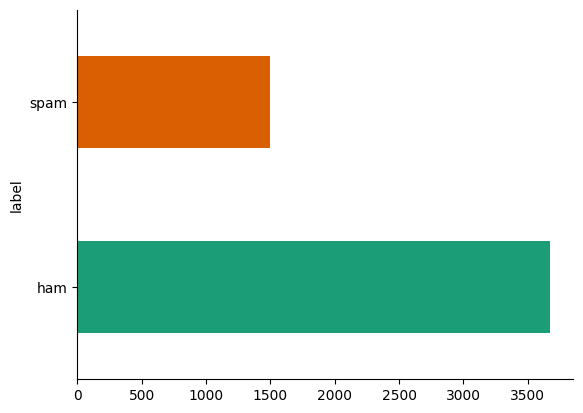

In [ ]:
# Class
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Define a function to remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['text'] = df['text'].apply(remove_stopwords)
df['text'].head()

0    Subject : enron methanol ; meter # : 988291 fo...
1    Subject : hpl nom january 9 , 2001 ( see attac...
2    Subject : neon retreat ho ho ho , ' around won...
3    Subject : photoshop , windows , office . cheap...
4    Subject : : indian springs deal book teco pvr ...
Name: text, dtype: object

In [ ]:
# Define a function to remove special characters and symbols
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

df['text'] = df['text'].apply(remove_special_characters)
df['text'].head()

0    Subject  enron methanol  meter   988291 follow...
1    Subject  hpl nom january 9  2001  see attached...
2    Subject  neon retreat ho ho ho   around wonder...
3    Subject  photoshop  windows  office  cheap  ma...
4    Subject   indian springs deal book teco pvr re...
Name: text, dtype: object

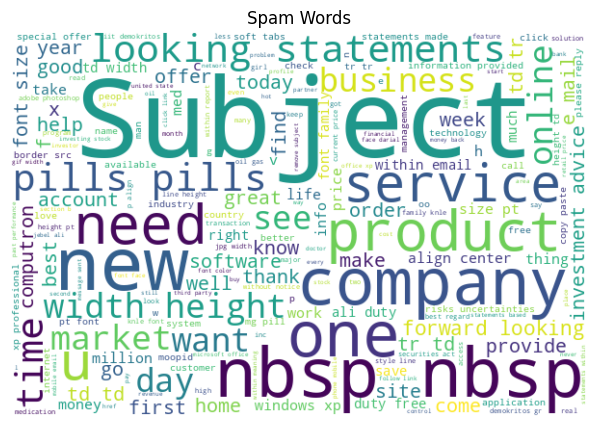

In [ ]:
# Create a word cloud for spam and ham messages
spam_words = ' '.join(list(df[df['label'] == 'spam']['text']))
spam_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(spam_words)

# Plotting the word clouds
plt.figure(figsize=(10, 5))

# Plotting Spam Word Cloud
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Words')
plt.show()


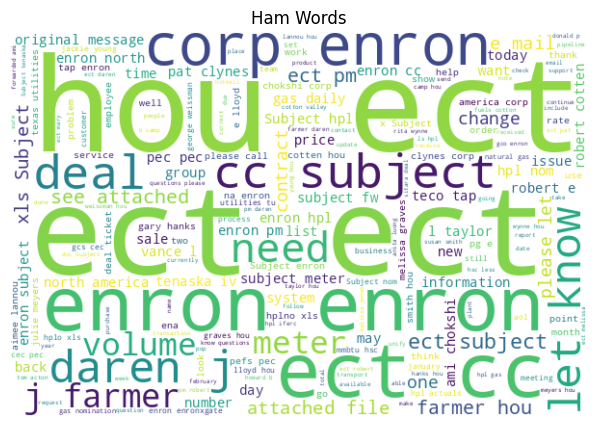

In [ ]:
ham_words = ' '.join(list(df[df['label'] == 'ham']['text']))
ham_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(ham_words)

# Plotting the word clouds
plt.figure(figsize=(10, 5))

# Plotting Ham Word Cloud
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Words')
plt.show()

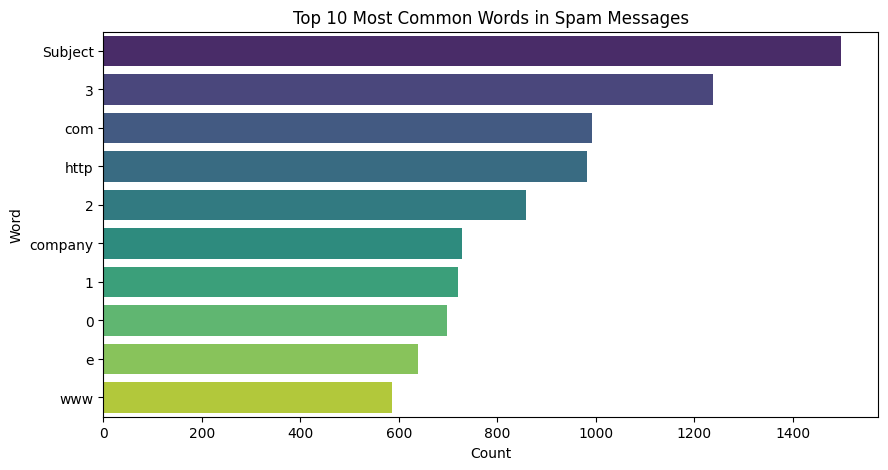

In [ ]:
from collections import Counter

# Count word frequencies in spam messages
spam_words_list = ' '.join(list(df[df['label'] == 'spam']['text'])).split()
spam_word_counts = Counter(spam_words_list)
spam_common_words = spam_word_counts.most_common(10)

# Convert to DataFrame for plotting
spam_common_df = pd.DataFrame(spam_common_words, columns=['Word', 'Count'])

# Plot the word frequencies
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=spam_common_df, palette='viridis')
plt.title('Top 10 Most Common Words in Spam Messages')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

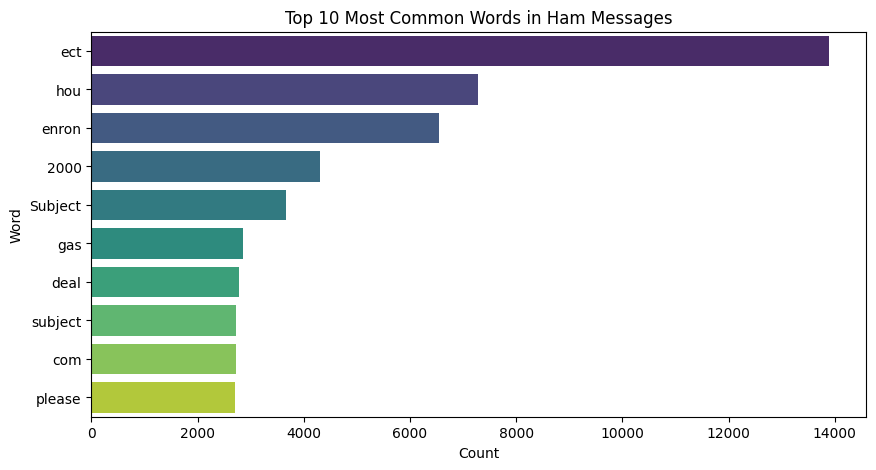

In [ ]:
# Count word frequencies in ham messages
ham_words_list = ' '.join(list(df[df['label'] == 'ham']['text'])).split()
ham_word_counts = Counter(ham_words_list)
ham_common_words = ham_word_counts.most_common(10)

# Convert to DataFrame for plotting
ham_common_df = pd.DataFrame(ham_common_words, columns=['Word', 'Count'])

# Plot the word frequencies
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=ham_common_df, palette='viridis')
plt.title('Top 10 Most Common Words in Ham Messages')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


BERT Tokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to("cuda")

def preprocess_and_encode(text):
    tokens = (tokenizer.encode_plus(text, add_special_tokens=True, return_tensors='pt', max_length=128, truncation=True)).to("cuda")

    with torch.no_grad():
        outputs = bert_model(**tokens)
        bert_embeddings = outputs[0][:, 0, :].cpu().numpy()

    return bert_embeddings

X = np.vstack(df['text'].apply(preprocess_and_encode))
y = list(df['label_num'])

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Dataset Split

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state=42)

##### Random Forest Classifier

In [ ]:
# Implementing RF
rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

Accuracy: 95.07246376811594
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       742
           1       0.93      0.90      0.91       293

    accuracy                           0.95      1035
   macro avg       0.94      0.93      0.94      1035
weighted avg       0.95      0.95      0.95      1035



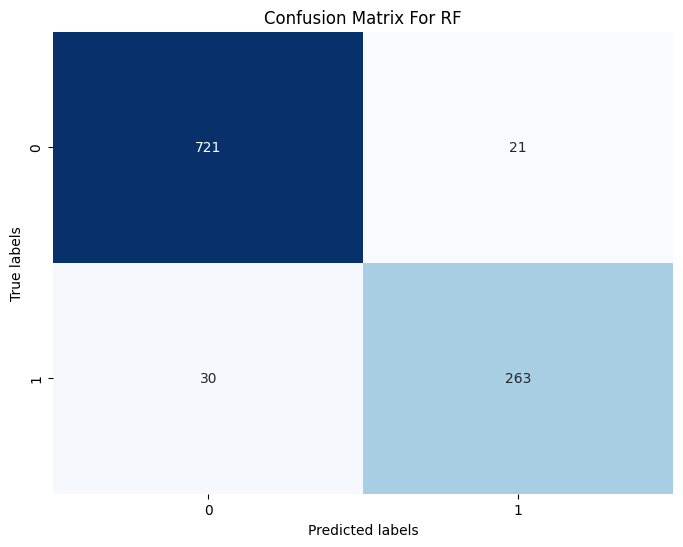

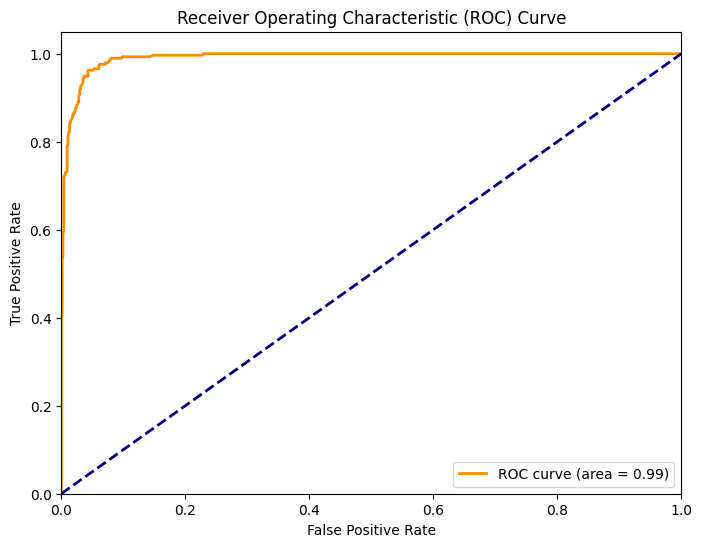

In [ ]:
# Predict using the Random Forest model
prd_rf = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, prd_rf) * 100
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, prd_rf))

# Calculate confusion matrix
cm = confusion_matrix(y_test, prd_rf)

# Plot confusion matrix with values
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix For RF')
plt.show()

# Predict probabilities
prd_rf_proba = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prd_rf_proba)

# Calculate AUC
roc_auc = roc_auc_score(y_test, prd_rf_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


##### Decision Tree

In [ ]:
# Implementing Decision Tree
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 88.79227053140096
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       742
           1       0.80      0.81      0.80       293

    accuracy                           0.89      1035
   macro avg       0.86      0.87      0.86      1035
weighted avg       0.89      0.89      0.89      1035



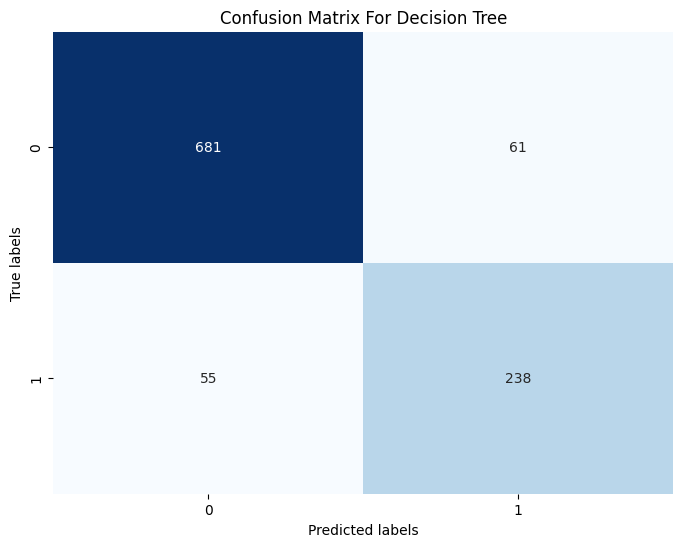

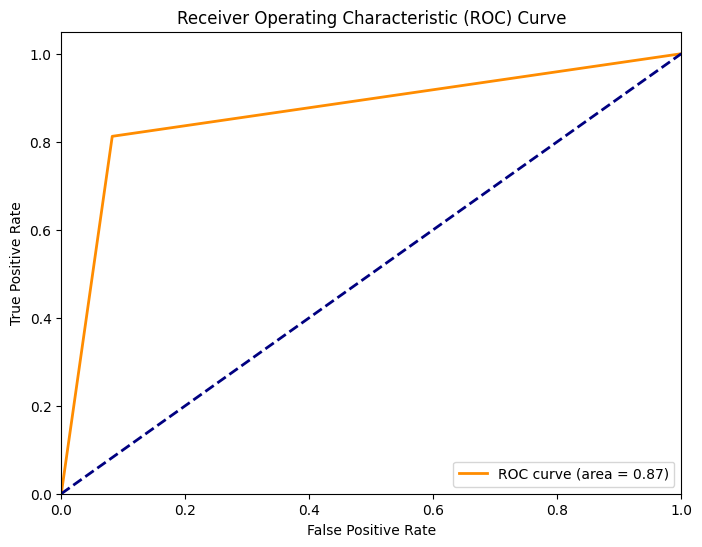

In [ ]:
# Predict using the Decision Tree model
prd_dt = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, prd_dt) * 100
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, prd_dt))

# Calculate confusion matrix
cm = confusion_matrix(y_test, prd_dt)

# Plot confusion matrix with values
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix For Decision Tree')
plt.show()

# Predict probabilities
prd_dt_proba = dt.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prd_dt_proba)

# Calculate AUC
roc_auc = roc_auc_score(y_test, prd_dt_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


##### Logistic Regression

In [ ]:
# Initialize the Logistic Regression model
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

Accuracy: 96.61835748792271
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       742
           1       0.95      0.93      0.94       293

    accuracy                           0.97      1035
   macro avg       0.96      0.95      0.96      1035
weighted avg       0.97      0.97      0.97      1035



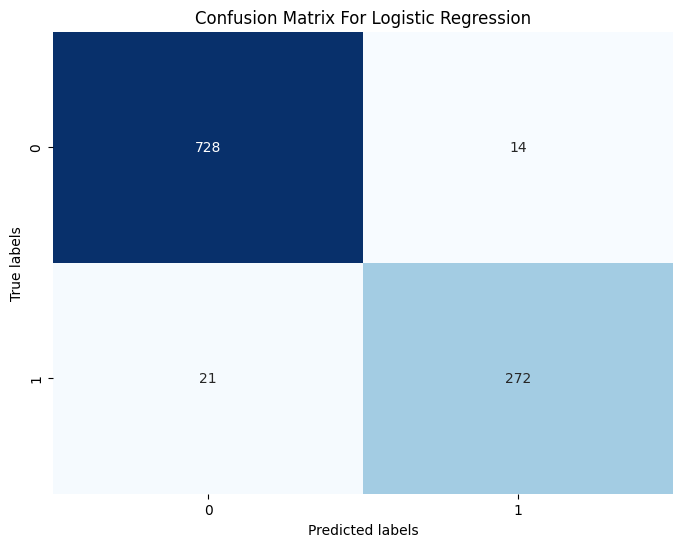

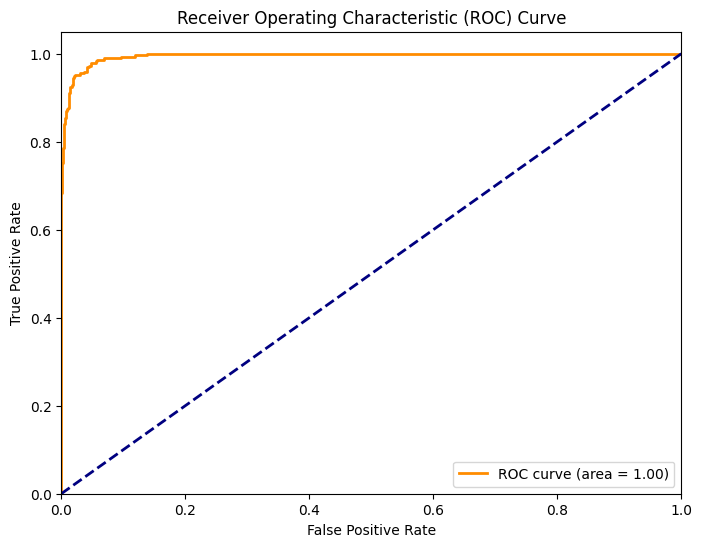

In [ ]:
# Predict using the Logistic Regression model
prd_lr = lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, prd_lr) * 100
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, prd_lr))

# Calculate confusion matrix
cm = confusion_matrix(y_test, prd_lr)

# Plot confusion matrix with values
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix For Logistic Regression')
plt.show()

# Predict probabilities
prd_lr_proba = lr.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prd_lr_proba)

# Calculate AUC
roc_auc = roc_auc_score(y_test, prd_lr_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


##### KNN

In [ ]:
# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy: 96.71497584541063
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       742
           1       0.92      0.97      0.94       293

    accuracy                           0.97      1035
   macro avg       0.95      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



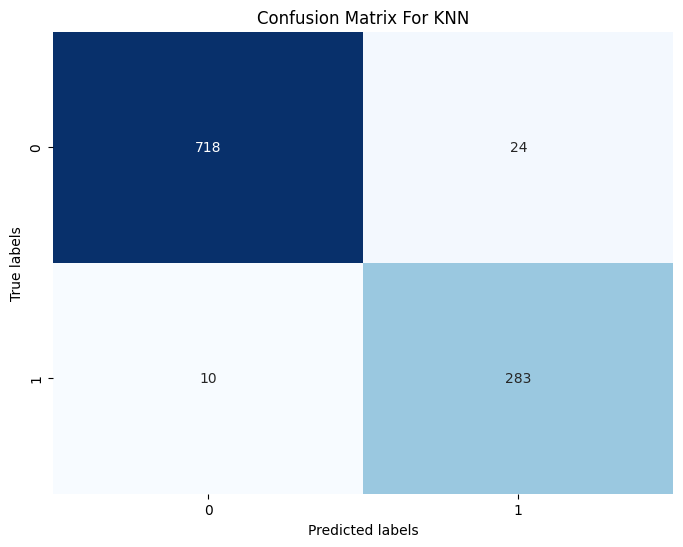

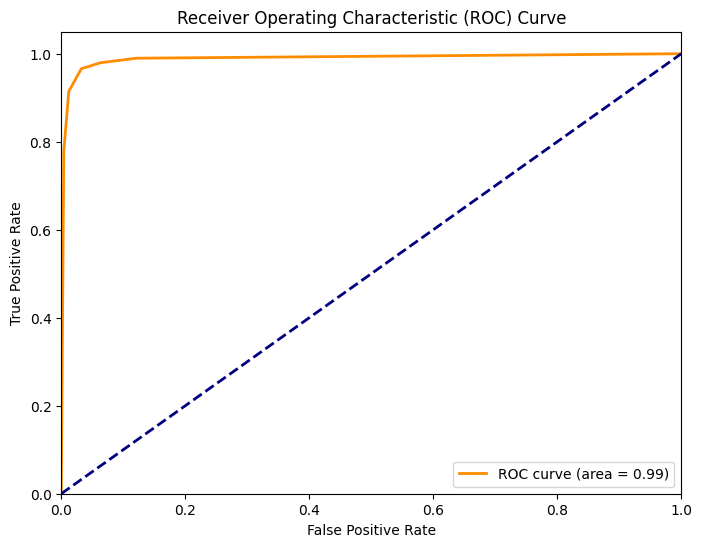

In [ ]:
# Predict using the KNN model
prd_knn = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, prd_knn) * 100
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, prd_knn))

# Calculate confusion matrix
cm = confusion_matrix(y_test, prd_knn)

# Plot confusion matrix with values
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix For KNN')
plt.show()

# Predict probabilities
prd_knn_proba = knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prd_knn_proba)

# Calculate AUC
roc_auc = roc_auc_score(y_test, prd_knn_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
